In [2]:
import os
import pandas as pd

root = 'unzipped/'

train_image_path = os.path.join(root, '001.Plastic_bag/images/train/*.jpg')
test_image_path = os.path.join(root, '001.Plastic_bag/images/test/*.jpg')
final_train_df_file_path = os.path.join(root, '001.Plastic_bag/final_train_df.lst')
final_test_df_file_path = os.path.join(root, '001.Plastic_bag/final_test_df.lst')

## Visualizing transpose image with bounding boxes

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import glob
import os
from PIL import Image
from pathlib import Path


def visualize_bounding_boxes(dataset = 'train', 
                             transpose_LEFT_RIGHT=False,
                             fix_file_path = None # fix_file_path for testing
                            ):    
    if dataset == 'train':
        image_path = train_image_path
        df = pd.read_csv(final_train_df_file_path, sep = "\t") 
    elif dataset == 'test':
        image_path = test_image_path
        df = pd.read_csv(final_test_df_file_path, sep = "\t") 
    else:
        raise ValueError
        
    if fix_file_path:
        img_file_path = fix_file_path
    else:     
        image_file_paths = glob.glob(image_path)
        num_of_images = len(image_file_paths)
        random_img_index = random.randint(0, num_of_images - 1)   
        img_file_path = image_file_paths[random_img_index]  
    
    print(f'img_file_path = {img_file_path}')   
    id_of_img = Path(img_file_path).stem  
    
    if dataset == 'train':
        df_rows = df.loc[(df.ImagePath == f'001.Plastic_bag/images/train/{id_of_img}.jpg') & (df.className == 0.0)]
    elif dataset == 'test':
        df_rows = df.loc[(df.ImagePath == f'001.Plastic_bag/images/test/{id_of_img}.jpg') & (df.className == 0.0)]
    else:
        raise ValueError
        
    img = Image.open(img_file_path)
    if transpose_LEFT_RIGHT:
        img = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
        
      
    image_width, image_height = img.size
    fig, ax = plt.subplots()
    ax.imshow(img)
    for index, row in df_rows.iterrows():
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        print(f"xmin = {xmin}, xmax={xmax}, ymin={ymin}, ymax={ymax}")

        new_xmin = xmin * image_width
        new_xmax = xmax * image_width
        new_ymin = ymin * image_height
        new_ymax = ymax * image_height    

        if transpose_LEFT_RIGHT:
            # flip the bb coordinates
            xmax_flipped = (image_width/2) - (new_xmin - image_width/2)
            xmin_flipped = (image_width/2) - (new_xmax - image_width/2)

            width = xmax_flipped - xmin_flipped
            height = new_ymax - new_ymin

            rect = patches.Rectangle((xmin_flipped, new_ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
            ax.add_patch(rect)
        else:
            width = new_xmax - new_xmin
            height = new_ymax - new_ymin

            rect = patches.Rectangle((new_xmin, new_ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
            ax.add_patch(rect)
    plt.show()
    

#### Test with original image id = 8457ea3663b29db0.jpg

img_file_path = unzipped/001.Plastic_bag/images/train/8457ea3663b29db0.jpg
xmin = 0.7194, xmax=0.9613, ymin=0.5579, ymax=0.801
xmin = 0.0, xmax=0.3563, ymin=0.6628, ymax=0.9992


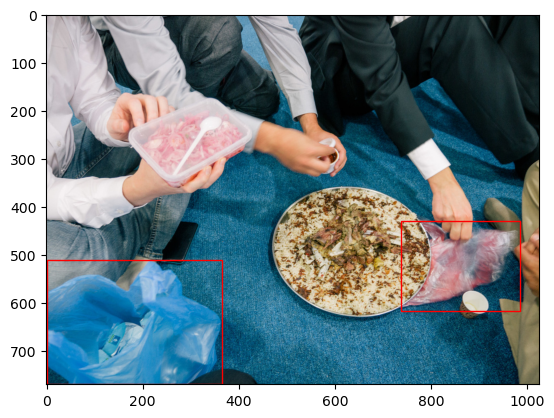

In [4]:
visualize_bounding_boxes(
    dataset = 'train', 
    transpose_LEFT_RIGHT=False,
    fix_file_path=os.path.join(root, "001.Plastic_bag/images/train/8457ea3663b29db0.jpg"))

#### Transpose FLIP Left Right of image above (id = 8457ea3663b29db0.jpg)

img_file_path = unzipped/001.Plastic_bag/images/train/8457ea3663b29db0.jpg
xmin = 0.7194, xmax=0.9613, ymin=0.5579, ymax=0.801
xmin = 0.0, xmax=0.3563, ymin=0.6628, ymax=0.9992


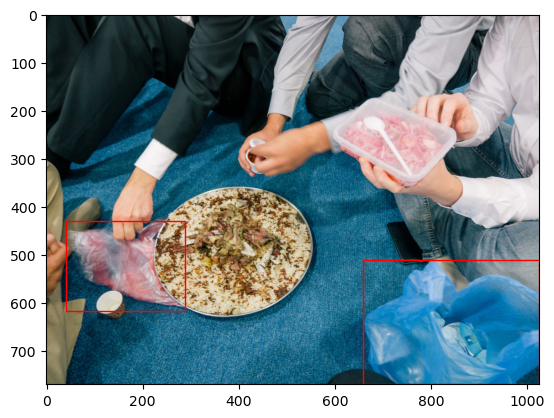

In [5]:
visualize_bounding_boxes(
    dataset = 'train', 
    transpose_LEFT_RIGHT=True,
    fix_file_path=os.path.join(root, "001.Plastic_bag/images/train/8457ea3663b29db0.jpg"))

#### Test with other images

img_file_path = unzipped/001.Plastic_bag/images/test/09f2960137eeb744.jpg
xmin = 0.532, xmax=0.843, ymin=0.5031, ymax=0.9969


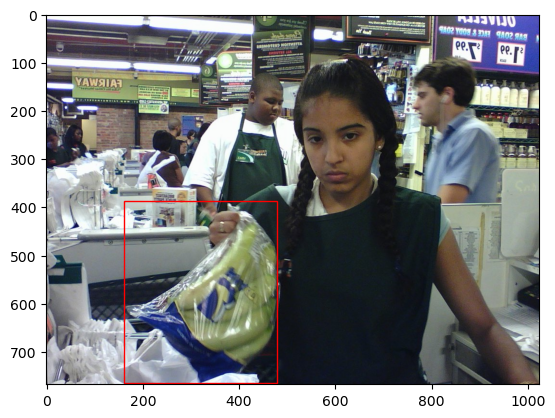

In [6]:
visualize_bounding_boxes(dataset = 'test', transpose_LEFT_RIGHT=True)

## Data Augmentation

In [13]:
def augment_data(dataset):  
    if dataset == 'train':
        image_path = train_image_path
        df = pd.read_csv(final_train_df_file_path, sep = "\t") 
    elif dataset == 'test':
        image_path = test_image_path
        df = pd.read_csv(final_test_df_file_path, sep = "\t") 
    else:
        raise ValueError  
    
    temp_df = pd.DataFrame(columns=["header_cols","label_width","className","XMin","YMin","XMax","YMax","ImagePath"],
                           dtype=object)
    counter = 0
    for index, row in df.iterrows():
        img_path = row["ImagePath"]
        id_ = Path(img_path).stem        
        img_file_path = os.path.join(root, f'001.Plastic_bag/images/{dataset}/{id_}.jpg') #image path for the physical location of the image(full path
        
        # print('root = ', root)
        # print(f'img_file_path = {img_file_path}')
        
        img = Image.open(img_file_path)
        image_width, image_height = img.size
        img_flip = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
        
        new_img_file_path = f'001.Plastic_bag/images/{dataset}/flipped_{id_}.jpg'
        # print(f'new_img_file_path = {new_img_file_path}')
        img_flip.save(os.path.join(root, new_img_file_path))  
        
        
        xmin = row['XMin'] * image_width
        xmax = row['XMax'] * image_width
        ymin = row['YMin']
        ymax = row['YMax']
        
        # getting the new normalized coordinates for the flipped bounding boxes
        new_xmin = (image_width/2 - (xmin - image_width/2)) / image_width
        new_xmax = (image_width/2 - (xmax - image_width/2)) / image_width        
        
        temp_df.loc[counter]=[2, 5, "0.000", new_xmin, ymin, new_xmax, ymax, new_img_file_path]
        counter += 1
    
    # df_merged = df.append(temp_df, ignore_index = True)
    df_merged = pd.concat([df, temp_df])
    df_merged.reset_index(inplace=True, drop=True)

    df_merged.to_csv(os.path.join(root, f"{dataset}.lst"), sep = "\t", float_format = "%.4f", header = None)
    print(len(df)) # original df
    print(f'original df length = {len(df)}')
    print(f"augmented df length = {len(temp_df)}")   
    print(f'total length = {len(df_merged)}')

### Before adding augmentation: Train and test data 

#### Train and test images

In [14]:
len(glob.glob(train_image_path))

449

In [15]:
len(glob.glob(test_image_path))

162

#### Train and test info with bounding boxes

In [16]:
len(pd.read_csv(final_train_df_file_path))

788

In [11]:
len(pd.read_csv(final_test_df_file_path))

198

### Augmentation of train and test datasets

In [17]:
augment_data(dataset='train')

788
original df length = 788
augmented df length = 788
total length = 1576


In [18]:
augment_data(dataset='test')

198
original df length = 198
augmented df length = 198
total length = 396


### After adding augmentation: Train and test data

#### Train and test images

In [19]:
len(glob.glob(train_image_path))

898

In [20]:
len(glob.glob(test_image_path))

324

#### Train and test info with bounding boxes

In [24]:
len(pd.read_csv(os.path.join(root, 'train.lst'))) 

1575

In [25]:
len(pd.read_csv(os.path.join(root, 'test.lst')))

395

## Verifying train and test lst files

In [26]:
def viz_bounding_box(img_file_path, xmin, ymin, xmax, ymax):
    img = Image.open(img_file_path)    
    image_width, image_height = img.size
    fig, ax = plt.subplots()
    ax.imshow(img)    

    new_xmin = xmin * image_width
    new_xmax = xmax * image_width
    new_ymin = ymin * image_height
    new_ymax = ymax * image_height    
       
    width = new_xmax - new_xmin
    height = new_ymax - new_ymin

    rect = patches.Rectangle((new_xmin, new_ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
    ax.add_patch(rect)
    plt.show()

### Image id = c217716dda83b4d9

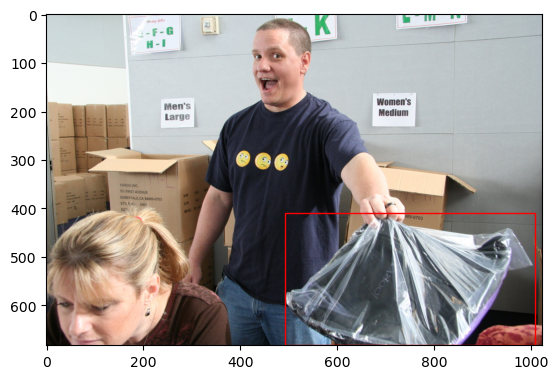

In [27]:
# at train.lst
# 143	2	5	0.0	0.4800	0.5994	0.9838	0.9991	001.Plastic_bag/images/train/c217716dda83b4d9.jpg
viz_bounding_box(img_file_path = os.path.join(root, '001.Plastic_bag/images/train/c217716dda83b4d9.jpg'),
                 xmin = 0.4800, 
                 ymin = 0.5994, 
                 xmax = 0.9838, 
                 ymax = 0.9991)

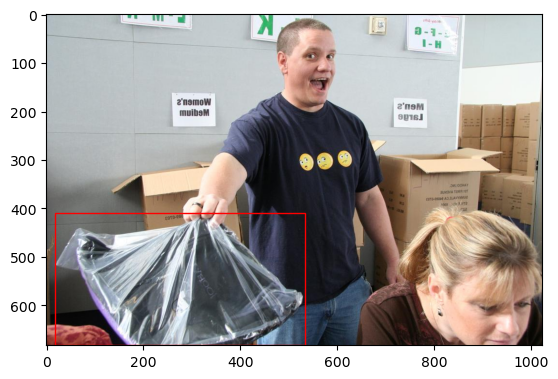

In [28]:
# # at train.lst
# 931	2	5	0.000	0.5200	0.5994	0.0162	0.9991	001.Plastic_bag\images\train\flipped_c217716dda83b4d9.jpg
viz_bounding_box(img_file_path = os.path.join(root, '001.Plastic_bag/images/train/flipped_c217716dda83b4d9.jpg'),
                 xmin = 0.5200, 
                 ymin = 0.5994, 
                 xmax = 0.0162, 
                 ymax = 0.9991)